# CBR(Case-based reasoning) & AR(Association Rules)
# 사례기반 추론 & 연관규칙
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# CBR: KNN (K-Nearest Neighbor; K 최근접 이웃)
## 1: target이 categorical

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer() # sklearn에 존재하는 유방암 data 사용

In [2]:
print("불러온 dataset의 키: \n{}".format(breast_cancer_data.keys()))

불러온 dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(breast_cancer_data['DESCR'] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data) # 독립변수 X
df_labels = pd.DataFrame(breast_cancer_data.target) # 종속변수 Y

In [5]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [7]:
df_labels.columns = ['target_y'] # y column명 변경

In [8]:
df_labels.columns

Index(['target_y'], dtype='object')

In [9]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print(breast_cancer_data.target_names)
print(df_labels['target_y'].value_counts()) # Y열의 데이터 개수 확인

# 0: 'malignant 악성' (212명)
# 1: 'benign 양성' (357명)

['malignant' 'benign']
1    357
0    212
Name: target_y, dtype: int64


In [11]:
df_data.describe() # 독립변수(feature)의 기초통계량

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
df_data_z_scale = pd.DataFrame(StandardScaler().fit_transform(df_data), columns=df_data.columns, index = df_data.index)
df_data_z_scale

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [13]:
df_data_z_scale.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


##### imbalanced data 조절을 위한 모듈 다운로드

In [14]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\hwwoo\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Under Sampling: Y값을 각각 {0, 1} 212명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(df_data_z_scale, random_state=2021)
y_shuffled =sklearn.utils.shuffle(df_labels, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

In [15]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.295334,-0.425771,3.387110,3.854074,1.319387,2.500819,3.113641,3.672569,0.527128,-0.225060,...,3.491579,-0.341520,3.635028,4.137101,0.904396,2.159281,1.789052,2.451387,1.276824,0.232978
1,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,...,-0.039178,0.342424,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804
2,0.821570,1.091476,0.858032,0.695130,1.660981,0.857725,1.919664,1.841196,1.593204,0.144934,...,0.954818,1.044281,0.858987,0.814646,1.360289,0.646540,1.375025,1.067290,1.017979,0.048444
3,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
4,0.631281,0.930909,0.701509,0.527612,0.075415,0.859620,1.158832,1.001086,1.326685,-0.087553,...,0.644194,0.871666,0.656444,0.499980,0.400283,1.350111,2.094174,1.677876,3.111387,0.675751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.088814,-0.956343,0.082420,-0.042062,0.237673,-0.042470,-0.049332,0.165104,-0.319891,-0.281764,...,-0.086807,-0.948927,0.039877,-0.199845,-0.033692,0.122361,0.182841,0.689670,-0.339339,-0.394329
420,0.026330,1.992051,0.023930,-0.088136,-1.005588,-0.008357,0.269940,-0.124821,-1.714551,-0.213719,...,-0.107515,2.420311,-0.141817,-0.204943,-1.063835,-0.074206,0.164131,-0.493589,-1.635181,-0.331709
421,-0.274725,0.290965,-0.325775,-0.330454,-1.637537,-0.977725,-0.888883,-0.937847,-0.360051,-0.555362,...,-0.366368,0.453158,-0.356573,-0.408333,-0.901643,-0.570395,-0.936517,-1.106307,-0.345810,-0.535085
422,-0.814352,0.125743,-0.851362,-0.758776,-0.800631,-1.141087,-1.051257,-1.115722,-0.637523,0.089648,...,-0.898570,0.122585,-0.919823,-0.781714,-0.945479,-1.126190,-1.184309,-1.313846,-0.556121,-0.433120


In [16]:
y_resampled

,target_y
0,0
1,0
2,0
3,0
4,0
...,...
419,1
420,1
421,1
422,1


In [17]:
print(breast_cancer_data.target_names)
print(y_resampled['target_y'].value_counts()) # Y열의 데이터 개수 확인

# 0: 'malignant' (212명)
# 1: 'benign' (212명)

['malignant' 'benign']
1    212
0    212
Name: target_y, dtype: int64


In [18]:
# train: validation = 7:3 분할
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 2021)

In [19]:
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

296
296
128
128


In [21]:
# knn 모델 (k=3)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights="distance", metric="euclidean")

# n_neighbors: 인접한 이웃 수 설정
# weights(default='uniform'): 'distance'로 설정하면, 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
# metric(default='minkowski'): 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)

In [22]:
classifier.fit(training_data, training_labels['target_y'])

# In [4]에서, pd.DataFrame()을 이용해서 시작했기 때문에 training_labels로 하면 warnings가 뜬다.
## 따라서 training_labels['target_y'] 으로 해주어야 array 형태로 정상적으로 작동이 됨.

## 혹은, In[4]에서 pd.DataFrame()형태는 따로 이름을 지어주어 training_labels을 1D array형태로 만들어준다면, training_labels로 가능

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [23]:
classifier.predict(validation_data)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [24]:
print(classifier.score(validation_data, validation_labels)) # accuracy

0.9375


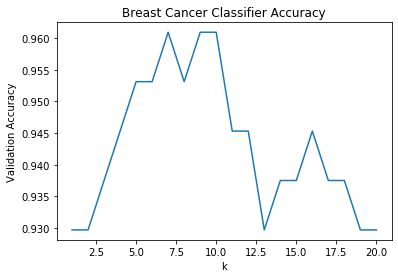

In [25]:
import matplotlib.pyplot as plt
k_list = range(1,21) # k= 1~20까지 조절
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
  classifier.fit(training_data, training_labels['target_y'])
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [26]:
# knn 모델 (k=7) - 제일 accuracy가 높도록
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, weights="distance", metric="euclidean")

classifier.fit(training_data, training_labels['target_y'])

# n_neighbors: 인접한 이웃 수 설정
# weights(default='uniform'): 'distance'로 설정하면, 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
# metric(default='minkowski'): 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [27]:
classifier.predict(validation_data)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [28]:
print(classifier.score(validation_data, validation_labels)) # accuracy

0.9609375


In [29]:
# Confusion Matrix 방법1
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, classifier.predict(validation_data))

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive

array([[62,  5],
       [ 0, 61]], dtype=int64)

In [37]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(np.array(validation_labels['target_y']), name='Actual') # validation_labels가 dataframe형태이므로 array형태로
y_pred = pd.Series(classifier.predict(validation_data), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive

Predicted,0,1
Actual,,
0,62,5
1,0,61


# CBR: KNN (K-Nearest Neighbor; K 최근접 이웃)
## 2: target이 continuous

In [1]:
import pandas as pd
df = pd.read_csv('dm_ex2.csv') ## 데이터 불러오기
# 또는 df = pd.read_csv('./dm_ex2.csv')

df.head()

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [2]:
from sklearn.model_selection import train_test_split
x = df[["education", "income", "women", "prestige"]]
y = df[["census"]]

In [3]:
# Z-score standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_std = scaler.fit_transform(x)

In [4]:
# Train: Test = 7:3 분리

train_x, valid_x, train_y, valid_y = train_test_split(x_std, y, test_size = 0.3, random_state = 2021)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

In [6]:
regressor.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [7]:
pred_y = regressor.predict(valid_x)
pred_y

array([[8679.64890467],
       [2524.59127885],
       [4143.77781057],
       [2491.81271339],
       [7203.20236503],
       [1932.69536601],
       [2462.7005815 ],
       [2344.87272035],
       [2332.12137099],
       [7236.12998453],
       [4474.29986193],
       [3801.68559151],
       [8514.11345021],
       [6660.19984672],
       [6974.69776293],
       [4709.09478565],
       [3783.62052112],
       [2753.25251741],
       [2702.2316837 ],
       [4170.36990142],
       [8460.85694251],
       [2759.10385051],
       [4168.00435136],
       [4503.4022889 ],
       [3876.88275183],
       [2141.22141644],
       [7630.86893686],
       [7678.85424195],
       [5967.10002024],
       [4163.89107738],
       [7369.07406585]])

In [8]:
import pandas as pd
from sklearn import svm, metrics
metrics.mean_squared_error(valid_y, pred_y)

2425252.288491855

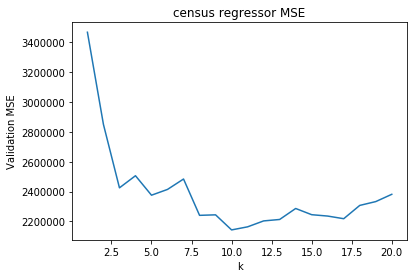

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, metrics
k_list = range(1,21) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance")
  regressor_k.fit(train_x, train_y)
  mses.append(metrics.mean_squared_error(valid_y, regressor_k.predict(valid_x)))
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("census regressor MSE")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 11, weights = "distance")

regressor.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [11]:
pred_y = regressor.predict(valid_x)
pred_y

array([[7884.09629314],
       [2899.00807123],
       [3766.77984788],
       [2301.96250073],
       [7684.41830534],
       [2717.10335908],
       [3914.85515338],
       [2420.11803028],
       [2742.91900375],
       [6986.88890595],
       [5228.18639107],
       [4537.25888563],
       [8113.04133279],
       [7276.94508087],
       [5944.53742404],
       [5458.36970774],
       [4705.12816438],
       [3066.11532322],
       [2371.71144089],
       [4082.83463151],
       [8184.38871461],
       [2982.40598324],
       [4098.05708139],
       [5150.00085   ],
       [4564.63655897],
       [2769.99287492],
       [6880.64654108],
       [7649.90550234],
       [6102.85211787],
       [3800.00321804],
       [7711.41818348]])

In [12]:
# MSE, RMSE 구하는 법 1
from sklearn import svm, metrics
from math import sqrt
mse = metrics.mean_squared_error(valid_y, pred_y)
rmse = sqrt(metrics.mean_squared_error(valid_y, pred_y))

print(mse)
print(rmse)

2164236.1000044723
1471.1342902687275


In [13]:
# MSE, RMSE 구하는 법 2
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(valid_y, pred_y)
RMSE = mean_squared_error(valid_y, pred_y)**0.5 # 또는 sqrt(mean_squared_error(valid_y, pred_y))

print(MSE)
print(RMSE)

2164236.1000044723
1471.1342902687275


# AR (Association Rules; 연관규칙)

In [108]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [52]:
import pandas as pd
df = pd.read_csv("chipotle.tsv", delimiter='\t', header=0)

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [53]:
# 연관분석 함수를 쓰려면 DataFrame을 list로 만들어야 한다
df_tmp=df[['order_id','item_name']]
df_tmp_arr=[[]for i in range(1835)] # order_id가 1834까지 존재. 1835 크기를 갖는 2차원 리스트 만듦.
num=0
for i in df_tmp['item_name'] :
    df_tmp_arr[df_tmp['order_id'][num]].append(i)
    num+=1

In [54]:
# order_id가 1부터 시작하므로, 0은 null값으로 들어간 것을 pop()으로 제거
df_tmp_arr.pop(0)
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num])) # 한 테이블에 같은 메뉴를 다수로 시킨 경우도 존재하므로, 중복값을 제거
    num+=1
df_tmp_arr

[['Chips and Tomatillo-Green Chili Salsa',
  'Chips and Fresh Tomato Salsa',
  'Izze',
  'Nantucket Nectar'],
 ['Chicken Bowl'],
 ['Chicken Bowl', 'Side of Chips'],
 ['Steak Burrito', 'Steak Soft Tacos'],
 ['Steak Burrito', 'Chips and Guacamole'],
 ['Chicken Crispy Tacos', 'Chicken Soft Tacos'],
 ['Chicken Bowl', 'Chips and Guacamole'],
 ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'],
 ['Chicken Burrito', 'Canned Soda'],
 ['Chicken Bowl', 'Chips and Guacamole'],
 ['Barbacoa Burrito', 'Nantucket Nectar'],
 ['Chicken Burrito', 'Izze'],
 ['Chips and Fresh Tomato Salsa', 'Chicken Bowl'],
 ['Carnitas Burrito', 'Canned Soda'],
 ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'],
 ['Steak Burrito', 'Side of Chips'],
 ['Carnitas Bowl', 'Bottled Water'],
 ['Chips and Tomatillo Green Chili Salsa',
  'Chicken Soft Tacos',
  'Chips and Guacamole'],
 ['Barbacoa Bowl', 'Chips'],
 ['Steak Burrito',
  'Chicken Salad Bowl',
  'Chicken Bowl',
  'Chips and Guacamole'],
 ['Chicken 

In [55]:
te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr) # 위 장바구니data를 one-hot encoding
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1830,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# support >= 0.05
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.083969,(Bottled Water)
1,0.051254,(Canned Soda)
2,0.150491,(Canned Soft Drink)
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
5,0.053435,(Chicken Salad Bowl)
6,0.058342,(Chicken Soft Tacos)
7,0.113413,(Chips)
8,0.059978,(Chips and Fresh Tomato Salsa)
9,0.258451,(Chips and Guacamole)


In [57]:
# confidence >= 0.1
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
# min_threshold의 default = 0.8
# antecedents : 조건절
# consequents : 결과절
# 만일 (조건절)이라면 (결과절).

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
1,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
2,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
3,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
4,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
5,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
6,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
7,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603


In [58]:
# lift >= 1
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# antecedents : 조건절
# consequents : 결과절
# 만일 (조건절)이라면 (결과절).

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
1,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
2,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
3,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568


- 손님이 "어떤 메뉴를 주로 먹나요?" 에 대해,

'Chicken Bowl'와 'Canned Soft Drink'를 같이 먹는다. (support 0.060523)

'Chips'을 포함하는 주문에 'Chicken Bowl'도 같이 들어있다 (주로 함께 먹는다). (confidence 0.586538)

참고 1:

https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/1-7-%EC%B2%AB-%EB%B2%88%EC%A7%B8-%EC%95%A0%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98-%EB%B6%93%EA%BD%83%EC%9D%98-%ED%92%88%EC%A2%85-%EB%B6%84%EB%A5%98/

http://hleecaster.com/ml-knn-classifier-example/

https://wikidocs.net/45429

https://dining-developer.tistory.com/27

https://rfriend.tistory.com/259

https://www.delftstack.com/ko/howto/python-pandas/how-to-randomly-shuffle-dataframe-rows-in-pandas/

https://morningcoding.tistory.com/entry/Python-67-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-kNN-%EC%A7%81%EC%A0%91-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

http://www.gisdeveloper.co.kr/?p=9932

https://velog.io/@guns/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-3%EC%9D%BC%EC%B0%A8-K-NN-K-Nearest-Neighbor

https://hellownd.tistory.com/entry/scikit-learn-KNN-%EC%82%AC%EC%9A%A9-%EB%B0%A9%EB%B2%95


참고 2:

http://hleecaster.com/ml-knn-regression-example/

https://thebook.io/007017/part01/ch04/02/02/

https://seogwipo.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-Pandas-%EC%99%80-metrics-%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%B4%EC%84%9C-XOR-%EC%97%B0%EC%82%B0%EC%9D%84-%EB%8D%94-%EA%B0%84%EB%8B%A8%ED%9E%88


참고 3:

http://rasbt.github.io/mlxtend/installation/

https://swlock.blogspot.com/2018/12/python-tsv.html

https://hezzong.tistory.com/entry/python-%EC%97%B0%EA%B4%80%EA%B7%9C%EC%B9%99%EB%B6%84%EC%84%9DA-Priori-Algorithm

https://tjansry354.tistory.com/10

https://lemontia.tistory.com/903


참고 4:

https://kutar37.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81Collaborative-Filtering-%EC%B6%94%EC%B2%9C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-1

https://data-science-hi.tistory.com/80

https://joyfuls.tistory.com/66

https://alex-blog.tistory.com/entry/CollaborativeFiltering

https://lsjsj92.tistory.com/565

https://wikidocs.net/44421

In [59]:
# Appendix
# Join (x,y dataset 합치기 - undersampling dataset 만들때 사용할 수도 있음)
df_dataset = pd.merge(df_data_z_scale, df_labels,
                      left_index=True, right_index=True,
                      how='left')
df_dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target_y
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0
